In [60]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from scipy.stats import gaussian_kde

# Lee el archivo CSV
df = pd.read_csv('Mental Health Dataset.csv')

# Muestra las primeras 10  filas del dfFrame en modo tabla
print("Primeras filas del dfFrame:")
display(df.head(10))

#Evalua cuantos registros tiene el dfset en un inicio
num_registros = df.shape[0]
display(f"El dataset tiene {num_registros} registros inicialmente")

# se uso para visualizar informacion con la extension de Vs code, Data Wrangler
df.head() 

Primeras filas del dfFrame:


,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
0,8/27/2014 11:29,Female,United States,Corporate,NaN,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
1,8/27/2014 11:31,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No
2,8/27/2014 11:32,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
3,8/27/2014 11:37,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes
4,8/27/2014 11:43,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
5,8/27/2014 11:49,Female,Poland,Corporate,No,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Not sure
6,8/27/2014 11:51,Female,Australia,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
7,8/27/2014 11:52,Female,United States,Corporate,No,No,No,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No
8,8/27/2014 12:18,Female,United States,Corporate,No,No,No,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
9,8/27/2014 12:37,Female,United States,Corporate,No,No,No,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No


'El dataset tiene 292364 registros inicialmente'

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
0,8/27/2014 11:29,Female,United States,Corporate,NaN,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
1,8/27/2014 11:31,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No
2,8/27/2014 11:32,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
3,8/27/2014 11:37,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes
4,8/27/2014 11:43,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes


Utilizando la herramienta Data Wrangler fue posible estudiar si alguna varibale posee registros vacios, aqui se pudo notar que para la variable "self_employed" hay registors vacios, especificamente un 2% de los mismos, por lo que se procede a hacer un preprocesamiento sencilo con el fin de eliminar del conjunto de datos las courrencias con esos datos faltantes:

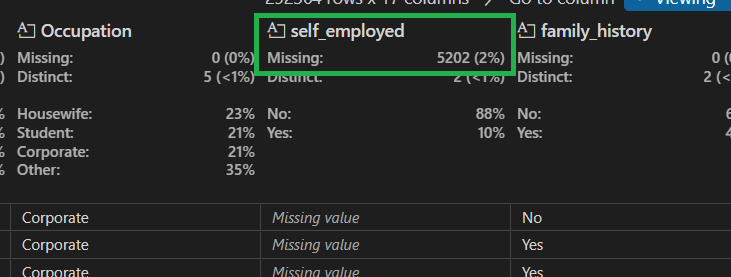

In [61]:
# Eliminar filas con valores vacíos en la columna 'self_employed'
df = df.dropna(subset=['self_employed'])

# Mostrar información del dataset para verificar la eliminación
display(df.head())

#Evalua cuantos registros tiene el dataset despues del preprocesamiento
num_registros = df.shape[0]
display(f"El dataset tiene {num_registros} registros despues del preprocesamiento")

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
3,8/27/2014 11:37,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes
4,8/27/2014 11:43,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
5,8/27/2014 11:49,Female,Poland,Corporate,No,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Not sure
6,8/27/2014 11:51,Female,Australia,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
7,8/27/2014 11:52,Female,United States,Corporate,No,No,No,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No


'El dataset tiene 287162 registros despues del preprocesamiento'

**EDA**

*Primer Aspecto:*

Planteamiento: Queremos analizar si existe una correlación entre la percepción de estrés creciente (Growing_Stress) y la ocupación (Occupation). Específicamente, buscamos determinar si ciertos tipos de ocupación están asociados con una mayor o menor percepción de estrés creciente.

Pasos a seguir para obtener esta informacion:

1. Convertir Growing_Stress y Occupation en variables numéricas.
2. Calcular la correlación entre ambas variables.
3. Visualizar la relación con un gráfico de conteo cruzado.

Correlación (coeficiente de Pearson) entre Growing_Stress y Occupation: -0.0239


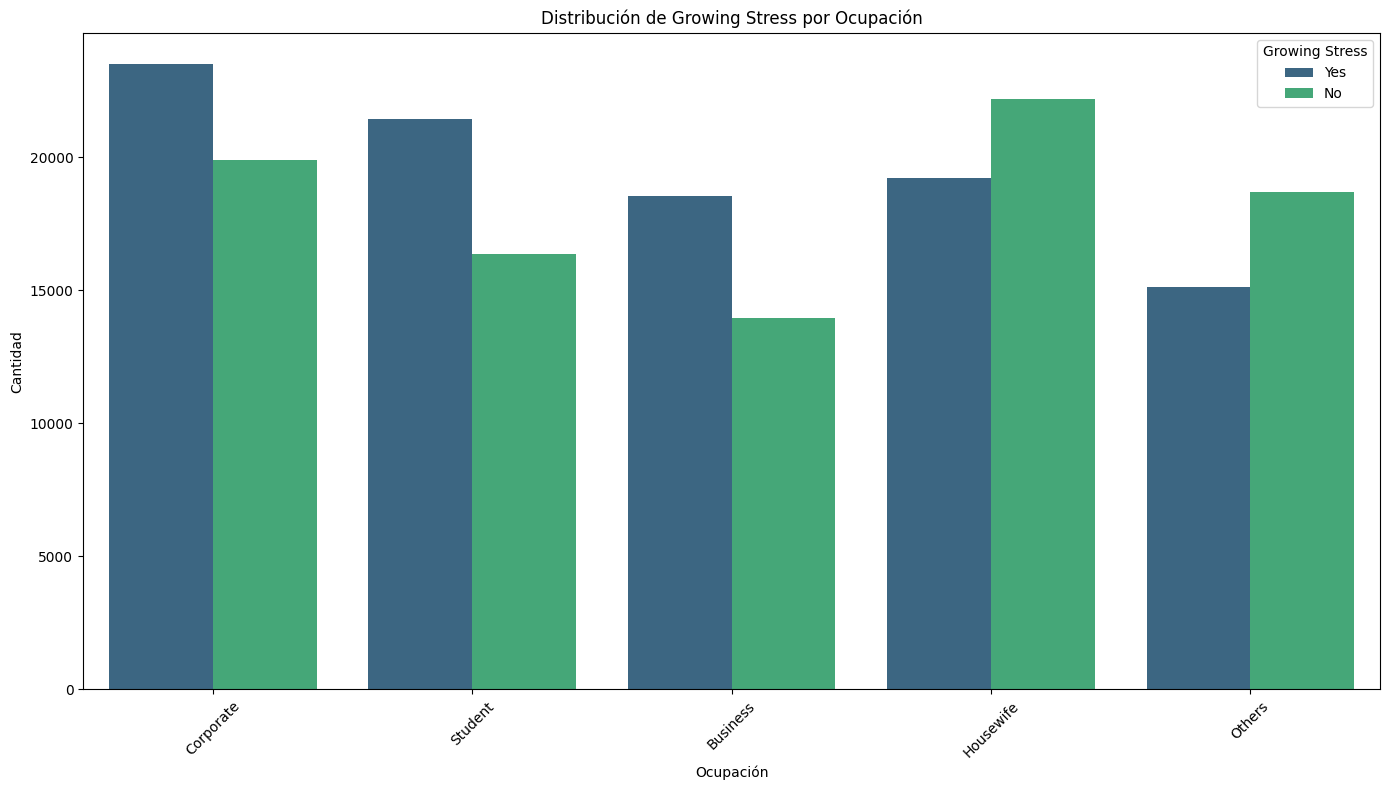

In [69]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import numpy as np

# Crear una copia del DataFrame original
df_temp = df.copy()

# Identificar y reemplazar registros con NaN o Inf en las columnas seleccionadas
df_temp.replace([np.inf, -np.inf], np.nan, inplace=True)

# Eliminar filas con NaN en las columnas seleccionadas
df_temp.dropna(subset=['Growing_Stress', 'Occupation'], inplace=True)

# Convertir las variables categóricas a variables numéricas
df_temp['Growing_Stress_Num'] = df_temp['Growing_Stress'].map({'Yes': 1, 'No': 0})
df_temp['Occupation_Num'] = df_temp['Occupation'].astype('category').cat.codes

# Eliminar filas con NaN en las variables numéricas creadas
df_temp.dropna(subset=['Growing_Stress_Num', 'Occupation_Num'], inplace=True)

# Calcular la correlación con el coeficiente de Pearson
# Se añadio el try porque se presentaban errores y fue necesario identificarlos
try:
    correlation, p_value = pearsonr(df_temp['Growing_Stress_Num'], df_temp['Occupation_Num'])
    print(f'Correlación (coeficiente de Pearson) entre Growing_Stress y Occupation: {correlation:.4f}')
except ValueError as e:
    print(f'Error al calcular la correlación: {str(e)}')

# Visualizar la relación con un gráfico de conteo cruzado
plt.figure(figsize=(14, 8))
sns.countplot(data=df_temp, x='Occupation', hue='Growing_Stress', palette='viridis')
plt.title('Distribución de Growing Stress por Ocupación')
plt.xlabel('Ocupación')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.legend(title='Growing Stress')
plt.tight_layout()
plt.show()


Observación: La correlación, obtenida con el coeficiente de Pearson, entre Growing_Stress y Occupation es aproximadamente -0.0239. Este valor cercano a cero sugiere que no existe una correlación lineal entre el nivel de estrés creciente (Growing_Stress) reportado por los individuos y la ocupación que desempeñan. En otras palabras, no hay una tendencia clara que indique que ciertos tipos de ocupaciones estén asociadas consistentemente con niveles más altos o más bajos de estrés creciente.

Adicionalmente, se genero un grafico de barras para poder estudiar desde el punto de vista visual la proporcion de personas que reportaron estres creciente y las que no, por profesion. Se pudo observar que no hay una tendencia notable. 

Esta observación sugiere que factores distintos a la ocupación podrían estar más fuertemente correlacionados con el estrés creciente percibido por los individuos, como otros aspectos personales o factores externos.

*Segundo Aspecto:*

Planteamiento: Se desea identificar cuál es la profesión que presenta el mayor estrés y cuál la que presenta el menor estrés. Esto es fundamental para entender cómo se presentan el estrés entre diferentes ocupaciones en el dataset proporcionado.

Pasos a seguir para obtener esta informacion:

1. Identificación de Valores Únicos y Frecuencia:

2. Obtener los valores únicos de la columna Occupation y contar la frecuencia de cada uno para entender la distribución de las ocupaciones en el dataset.

3. Calcular el Promedio de Estrés por Ocupación:

4. Agrupar los datos por Occupation.

6. Determinación de la Profesión con Mayor y Menor Estrés:
    -Identificar la ocupación con el promedio más alto de estrés percibido.
    -Identificar la ocupación con el promedio más bajo de estrés percibido.

In [63]:
# Paso 1: Identificar valores únicos y frecuencia de cada ocupación
occupation_counts = df['Occupation'].value_counts()

# Paso 2: Crear la columna Growing_Stress_Num
df['Growing_Stress_Num'] = df['Growing_Stress'].map({'Yes': 1, 'No': 0})

# Paso 3: Calcular el promedio de estrés para cada ocupación
stress_mean_by_occupation = df.groupby('Occupation')['Growing_Stress_Num'].mean()

# Paso 4: Identificar la profesión con mayor estrés (mayor promedio) y menor estrés (menor promedio)
occupation_max_stress = stress_mean_by_occupation.idxmax()
max_stress_value = stress_mean_by_occupation.max()

occupation_min_stress = stress_mean_by_occupation.idxmin()
min_stress_value = stress_mean_by_occupation.min()

# Observación
print("La profesión con mayor estrés es:", occupation_max_stress)
print("La profesión con menor estrés es:", occupation_min_stress)


La profesión con mayor estrés es: Business
La profesión con menor estrés es: Others



Observaciones:

Según los datos analizados, los profesionales que se identifican con la ocupación de "Business" experimentan niveles de estrés más altos (en promedio) en comparación con otras ocupaciones registradas en el dataset. Esto sugiere que los factores relacionados con el entorno laboral y las responsabilidades pueden estar contribuyendo significativamente a niveles percibidos de estrés entre quienes trabajan en el campo de los negocios.

Contrariamente, los datos indican que las personas agrupadas bajo la categoría general de "Others" experimentan niveles de estrés promedio más bajos. Aunque esta categoría puede incluir una variedad de ocupaciones que no se encuentran detalladas en el dataset, es notable que, en promedio, reportan niveles de estrés más bajos en comparación con otras profesiones registradas. Al no conocer que ocupaciones constituyen este grupo hace que el resultado no sea de gran utilidad en el analisis. 

*Tercer Aspecto:*

Planteamiento: Investigar cómo la historia familiar de problemas de salud mental se relaciona con el recibir tratamiento o no.

Pasos a seguir para obtener esta informacion:

1. Calcular la proporción de individuos con historia familiar de problemas de salud mental (family_history).

2. Calcular la proporción de individuos que han recibido tratamiento (treatment).

3. Visualización de Distribuciones:

4. Mostrar en grafico de barras  cómo la historia familiar afecta la decisión de tomar tratamiento.

5. Determinar la correlación entre family_history y treatment para evaluar su asociación.

Proporción de historia familiar de problemas de salud mental:
family_history
No     60.477361
Yes    39.522639
Name: proportion, dtype: float64

Proporción de personas que recibieron tratamiento:
treatment
Yes    50.404998
No     49.595002
Name: proportion, dtype: float64


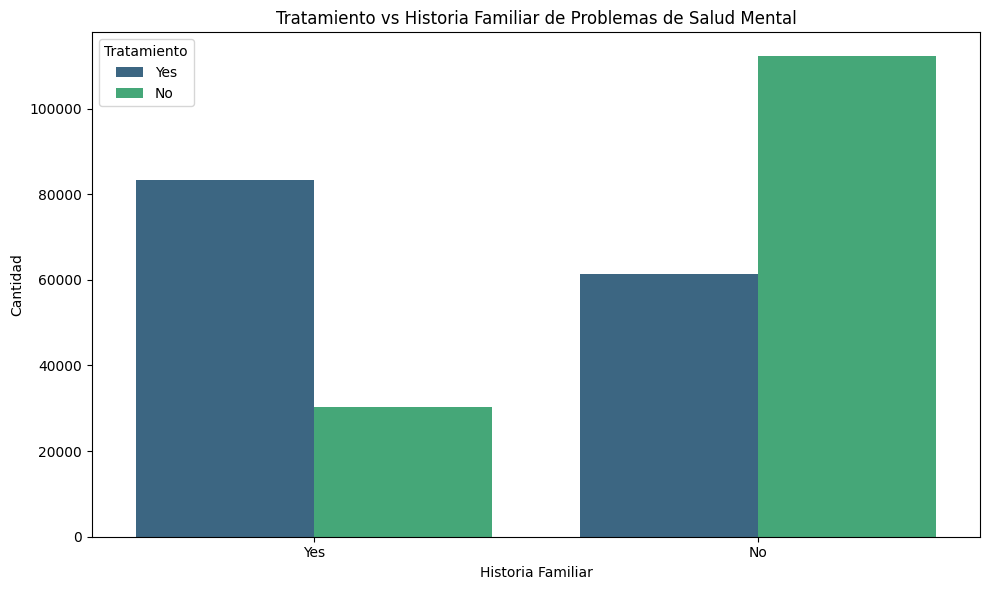


Correlación (coeficiente de Pearson) entre historia familiar y tratamiento: 0.3715


In [64]:
# Paso 1: Frecuencias y proporciones
family_history_prop = df['family_history'].value_counts(normalize=True) * 100
treatment_prop = df['treatment'].value_counts(normalize=True) * 100

print("Proporción de historia familiar de problemas de salud mental:")
print(family_history_prop)
print("\nProporción de personas que recibieron tratamiento:")
print(treatment_prop)

# Paso 2: Visualización
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='family_history', hue='treatment', palette='viridis')
plt.title('Tratamiento vs Historia Familiar de Problemas de Salud Mental')
plt.xlabel('Historia Familiar')
plt.ylabel('Cantidad')
plt.legend(title='Tratamiento')
plt.tight_layout()
plt.show()

# Paso 3: Correlación
correlation, p_value = pearsonr(df['family_history'].map({'Yes': 1, 'No': 0}), df['treatment'].map({'Yes': 1, 'No': 0}))
print(f'\nCorrelación (coeficiente de Pearson) entre historia familiar y tratamiento: {correlation:.4f}')


Observaciones: Aproximadamente el 39.52% de las personas  reportan tener una historia familiar de problemas de salud mental, mientras que el 60.48% no tienen esta historia. Cerca del 50.40% de los individuos han recibido tratamiento por problemas de salud mental, mientras que el 49.60% no han recibido tratamiento.

El coeficiente de Pearson calculado es de aproximadamente 0.3715, lo cual indica una correlación positiva moderada entre tener una historia familiar de problemas de salud mental y la probabilidad de recibir tratamiento. Esto sugiere que las personas con antecedentes familiares de problemas de salud mental tienden a buscar tratamiento con mayor frecuencia que aquellos sin tales antecedentes, esto podemos inferir que se debe a un mayor conocimiento en el area o un menor tabu o estigma al respecto.

*Cuarto Aspecto:*

Planteamiento:Se Quiere analizar la proporción de personas que reciben tratamiento en función de su país de origen y género. Se cree que la prevalencia de tratamiento puede variar según el país y que puede haber diferencias en la prevalencia de tratamiento entre géneros.

Pasos para Obtener la Información


* Análisis por País:

1. Agrupar los datos por la columna "Country".
2. Calcular la proporción de personas que reciben tratamiento (treatment) para cada país.
3. Imprimir y visualizar la prevalencia de tratamiento por país.

* Análisis por Género:

1. Agrupar los datos por la columna "Gender":
2. Calcular la proporción de personas que reciben tratamiento para cada género.
2. Imprimir y visualizar la prevalencia de tratamiento por género.


Para ambos casos se desea obtener  una Visualización con Gráficos de Barras para representar la prevalencia de tratamiento por país y por género.



Prevalencia de tratamiento por país:
treatment                     No       Yes
Country                                   
Australia               0.395619  0.604381
Belgium                 1.000000       NaN
Bosnia and Herzegovina  1.000000       NaN
Brazil                  0.666667  0.333333
Canada                  0.424584  0.575416
Colombia                1.000000       NaN
Costa Rica              1.000000       NaN
Croatia                      NaN  1.000000
Czech Republic          1.000000       NaN
Denmark                      NaN  1.000000
Finland                 1.000000       NaN
France                  1.000000       NaN
Georgia                 1.000000       NaN
Germany                 0.500000  0.500000
Greece                  1.000000       NaN
India                   0.702956  0.297044
Ireland                 0.507931  0.492069
Israel                  1.000000       NaN
Italy                   1.000000       NaN
Mexico                  1.000000       NaN
Moldova          

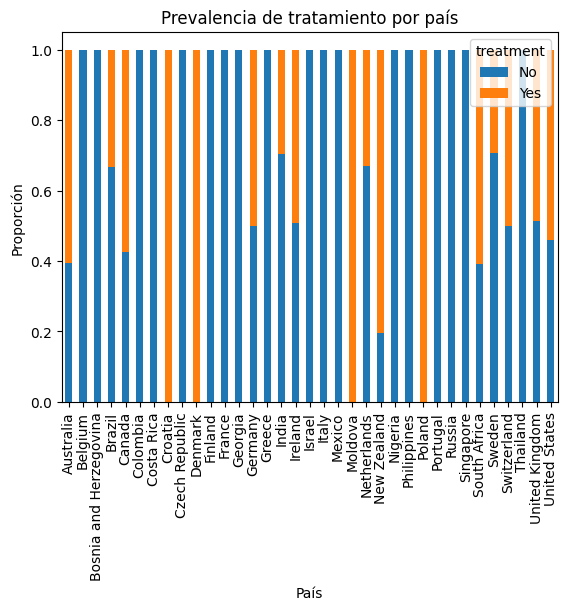

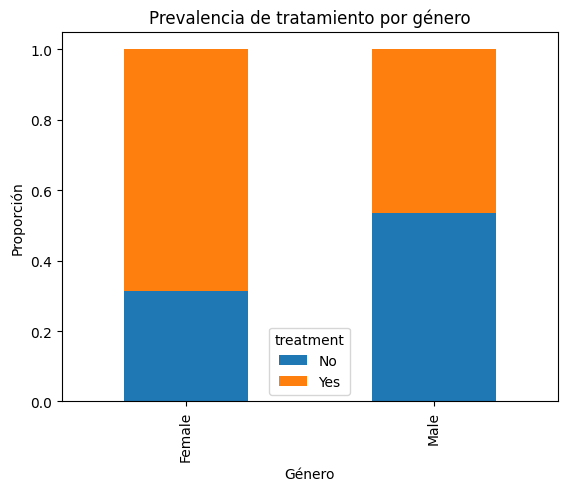

In [65]:
# Por país
treatment_by_country = df.groupby("Country")["treatment"].value_counts(normalize=True).unstack()
print("Prevalencia de tratamiento por país:")
print(treatment_by_country)

# Por género
treatment_by_gender = df.groupby("Gender")["treatment"].value_counts(normalize=True).unstack()
print("\nPrevalencia de tratamiento por género:")
print(treatment_by_gender)


# Gráfico de barras para países
treatment_by_country.plot(kind="bar", stacked=True)
plt.title("Prevalencia de tratamiento por país")
plt.xlabel("País")
plt.ylabel("Proporción")
plt.show()

# Gráfico de barras para género
treatment_by_gender.plot(kind="bar", stacked=True)
plt.title("Prevalencia de tratamiento por género")
plt.xlabel("Género")
plt.ylabel("Proporción")
plt.show()


Observaciones:

En cuanto al pais hay que tomar en cuenta que la mayoría de los registros provienen de Estados Unidos, lo que indica una mayor representación de datos para este país en particular, donde la prevalencia de tratamiento parece estar equilibrada, con una proporción similar de personas que reciben y no reciben tratamiento, sin embargo con una tendencia ligeramente mayor a recibir tratamiento.

En otros Países (como Polonia, Australia y Canadá) También se observa una distribución equilibrada en la prevalencia de tratamiento.No hay diferencias significativas en la proporción de personas que reciben tratamiento en comparación con Estados Unidos. Sin embargo hay paises como Italia, Mexico o Francia que no reflejan que las personas esten recibiendo tratamiento, sin embargo estos datos donde los valores obtenidos en el analisis son tan polares, podemos considerarlos como valores anomalos debido a la falta de registros suficientes en esos paises como para llegar a conclusiones al respecto, por lo que consideraremos despresiable sus proporciones en este análisis. 

En cuanto el género. Existe una mayor cantidad de registros de individuos de género femenino en comparación con el género masculino en la muestra analizada. Cerca de dos tercios de las mujeres reciben tratameinto mientras que tan solo un poco mas de un tercio de los hombres lo hacen. Esto puede deberse o bien a sesgos de la data o a otros factores como por ejemplo un mayor estigma social presente en los hombres.



*Quinto Aspecto:*

Planteamiento: Se desea Investigar la asociación entre las variables categóricas Mood_Swings y Social_Weakness. Esto con el fin de saber si hay alguna asociacion entre la frecuencia en los cambios de animo de una persona y la ansiedad social.

Pasos a Seguir para encontrar esta informacion:

1. Construir una tabla  para examinar cómo se distribuyen conjuntamente las categorías de Mood_Swings y Social_Weakness.Esta tabla nos permitirá ver la proporción de personas que pertenecen a cada combinación de categorías (por ejemplo, alta frecuencia de mood swings con alta debilidad social).

2. Representar la informacion de la tabla en un heatmap (mapa de calor).

3. Calcular el coeficiente de Pearson. Dado que Mood_Swings y Social_Weakness son variables categóricas, asignaremos números a las categorías únicas de cada variable. Calcularemos el coeficiente de  de Pearson entre estas el cual nos proporcionará una medida de la asociación lineal (si existe) entre las variables en términos de sus categorías.

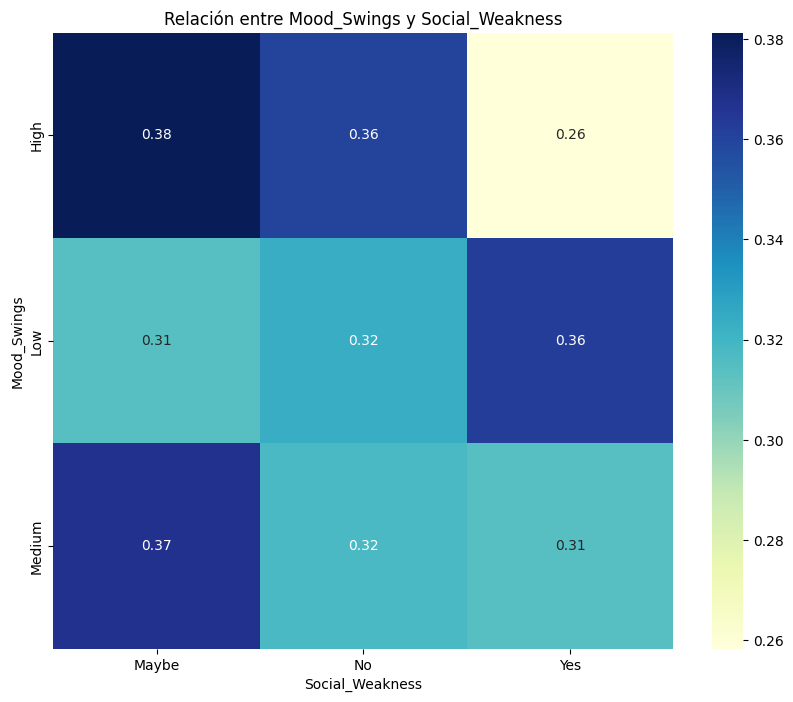

Coeficiente de Pearson entre Mood_Swings y Social_Weakness: 0.0323


In [68]:
# Paso 1: Construir una Tabla de Contingencia
contingency_table = pd.crosstab(df['Mood_Swings'], df['Social_Weakness'], normalize='index')

# Paso 2: Visualizar con Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(contingency_table, annot=True, cmap='YlGnBu', cbar=True)
plt.title('Relación entre Mood_Swings y Social_Weakness')
plt.xlabel('Social_Weakness')
plt.ylabel('Mood_Swings')
plt.show()

# Paso 3: Calcular el Coeficiente de Pearson
# Asignar números a las categorías únicas para calcular el coeficiente de Pearson
mood_swings_encoded = df['Mood_Swings'].astype('category').cat.codes
social_weakness_encoded = df['Social_Weakness'].astype('category').cat.codes

correlation, p_value = pearsonr(mood_swings_encoded, social_weakness_encoded)

print(f'Coeficiente de Pearson entre Mood_Swings y Social_Weakness: {correlation:.4f}')


Observaciones: 

El coeficiente de Pearson es cercano a cero (0.0323), es de 3,23%. Esto indica una correlación muy débil entre Mood_Swings y Social_Weakness. Una correlación cercana a cero indica que los cambios en una variable  Mood_Swings no están asociados linealmente con los cambios en la otra variable Social_Weakness.

Dado que el coeficiente es bajo, no podemos inferir una relación significativa entre el aumento o disminución en Mood_Swings y Social_Weakness basándonos en la correlación lineal.

El heatmap nos permite visualizar la tabla de contingencia normalizada entre Mood_Swings y Social_Weakness. Dado que todas las proporciones son casi iguales, esto se alinea con el bajo coeficiente de Pearson obtenidon el heatmap, todas las proporciones son similares y no hay patrones distintos, esto indica que las categorías de Mood_Swings y Social_Weakness están distribuidas de manera uniforme o no están relacionadas linealmente de manera significativa.

En conclusion hay una correlación débil basado en el coeficiente de Pearson y la visualización en el heatmap, podemos concluir que Mood_Swings y Social_Weakness no muestran una relación lineal fuerte en el conjunto de datos analizado. Sin embargo, es importante tener en cuenta que la falta de correlación lineal no implica necesariamente la falta de relación entre estas variables, pero si podemos asumir para el alcance de este analisis que ambas vriables no estan relacionadas directamente por lo que la frecuencia en los cambios de humor de una persona no van directamente relacionados en la expresion de ansiedad sociales.





